In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
from sklearn.metrics import plot_roc_curve
import tensorflow as tf
from sklearn.metrics import confusion_matrix, average_precision_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
#Import the packages that will likely be required based on the guides followed
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error

In [3]:
from google.colab import files#Only needed if you are working on Colab, choose the file you are using, otherwise, ignore this block of code if you are working in a directory where the file is already present
uploaded = files.upload()

In [4]:
features = pd.read_csv('balanced.csv')#Read the file
features.head(5)#Print the first five lines

,cid,acvalue,smiles,Activity,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,...,De,L1p,L2p,L3p,P1p,P2p,E1p,E2p,E3p,Tp,Ap,Vp,Kp,Dp,L1i,L2i,L3i,P1i,P2i,E1i,E2i,E3i,Ti,Ai,Vi,Ki,Di,L1s,L2s,L3s,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,225100,4.0000,O=C(O)CSc1nc2cc(Cl)c(Cl)cc2[nH]1,inactive,1,1.2172,1.481576,34.1060,30.904758,9,10,22,16,6,0,9,2,2,1,0,0.0,2.0,0.0,0.0,2.0,4866.470694,3285.911675,5125.915532,5823.261916,4023.627644,3755.414546,2366.160564,2010.701122,1851.892400,6349.023301,7253.070731,10367.565415,10340.266164,7838.209328,6365.402729,...,1.413581,11.445241,1.176596,0.258144,0.888607,0.091351,0.563188,0.284529,0.217283,12.879982,16.724678,33.080940,0.832910,1.065000,11.312779,1.437079,0.345254,0.863893,0.109742,0.548770,0.423822,0.448298,13.095112,20.659296,39.367328,0.795840,1.420891,11.688495,1.325009,0.348914,0.874729,0.099159,0.585817,0.360563,0.458213,13.362418,20.027951,38.794126,0.812094,1.404593
1,1825716,0.5500,Cc1ccc(OCCSc2ncccn2)c(Br)c1,inactive,0,1.9905,3.962090,32.9382,40.500309,12,12,31,18,13,0,13,2,1,1,0,0.0,0.0,1.0,0.0,1.0,9065.915841,3905.568826,5680.398994,6633.296591,5370.358053,3698.544856,3127.935587,2890.234735,4082.689219,7739.752888,9009.086446,12129.769040,12295.294407,10303.119687,8950.141038,...,1.434107,16.154816,1.937974,0.569152,0.865656,0.103846,0.482243,0.533074,0.208126,18.661941,41.605152,78.085876,0.798484,1.223443,17.856844,1.913562,0.790178,0.868499,0.093069,0.589039,0.508048,0.436256,20.560585,49.792328,97.353445,0.802748,1.533343,17.690543,1.835237,0.746796,0.872634,0.090528,0.578062,0.470886,0.395607,20.272577,47.048120,91.566431,0.808951,1.444554
2,11679800,0.0168,CC(C)=CCC[C@](C)(O[C@@H]1O[C@H](CO)[C@@H](O)[C...,active,1,0.5752,0.330855,29.2113,31.098344,9,10,24,16,8,0,10,2,2,0,0,0.0,2.0,0.0,0.0,2.0,4868.502822,3310.125851,5175.359948,5908.016572,4138.596092,3805.875026,2418.653172,2153.635522,1851.892400,6411.190790,7482.543964,10857.595624,11041.939075,8687.377805,6886.516683,...,1.303480,11.450959,1.168955,0.327426,0.884426,0.090285,0.619005,0.292564,0.145712,12.947340,17.517751,34.847909,0.826638,1.057281,10.717133,1.409146,0.506650,0.848349,0.111545,0.540422,0.426244,0.372027,12.632930,21.245790,41.530153,0.772523,1.338693,10.934821,1.303764,0.486393,0.859319,0.102457,0.562681,0.366310,0.342588,12.724978,20.209189,39.868393,0.788979,1.271579
3,14162967,0.0168,CC(C)=CCC[C@](C)(O[C@@H]1O[C@H](CO)[C@@H](O)[C...,active,0,0.8200,0.672400,134.7535,90.681236,0,0,86,34,52,0,30,0,4,0,0,0.0,0.0,0.0,0.0,0.0,5404.630962,6175.020141,10569.200499,13928.758477,13530.953189,12097.098300,10334.456402,9302.450418,8506.558222,15187.424871,21022.387874,36014.128236,51007.246921,57789.310825,54153.421222,...,1.462925,13.356831,4.713860,1.551971,0.680684,0.240225,0.480137,0.404662,0.310977,19.622663,91.007428,208.345661,0.521026,1.195776,14.202111,5.192340,1.924706,0.666167,0.243553,0.542372,0.492669,0.478277,21.319157,111.070800,274.321969,0.499250,1.513318,14.162502,5.110835,1.876100,0.669640,0.241653,0.539443,0.477526,0.454229,21.149437,108.540907,265.486570,0.504460,1.471197
4,14525327,3.0000,C[C@H](CC[C@@H](O)C(C)(C)O)[C@H]1CC[C@@]2(C)[C...,inactive,1,0.5720,0.327184,23.2561,66.975067,27,30,52,33,19,0,27,2,3,0,0,0.0,1.0,0.0,0.0,1.0,6331.435084,6142.860146,9234.538103,9868.519933,9714.146137,9004.759376,7164.482540,7034.156940,7315.727153,13665.319127,16934.930973,24849.027523,27613.596117,26181.310788,23695.728859,...,1.562560,32.678344,1.875418,1.309409,0.911195,0.052294,0.519289,0.277799,0.326617,35.863171,106.530578,222.641628,0.866793,1.123705,35.436934,2.242259,1.712113,0.899613,0.056923,0.609762,0.443232,0.586587,39.391306,143.969814,319.403533,0.849420,1.639581,35.140178,2.228841,1.614423,0.901413,0.057174,0.600107,0.432198,0.526542,38.983441,138.651258,304.079293,0.852119,1.558847


In [5]:
print('The shape of our features is:', features.shape)#Dimension of the dataset

The shape of our features is: (292, 1879)


In [6]:
features.describe()#Equivalent to summary function on R

,cid,acvalue,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,...,De,L1p,L2p,L3p,P1p,P2p,E1p,E2p,E3p,Tp,Ap,Vp,Kp,Dp,L1i,L2i,L3i,P1i,P2i,E1i,E2i,E3i,Ti,Ai,Vi,Ki,Di,L1s,L2s,L3s,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
count,2.920000e+02,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,9.311034e+07,0.984303,0.780822,-0.289388,0.641622,46.318243,58.987878,15.839041,18.017123,48.907534,28.397260,20.510274,0.0,21.527397,2.212329,3.359589,0.099315,0.017123,0.393836,0.777397,0.010274,0.0,1.181507,5666.186609,5457.027849,8254.057134,9105.793340,8904.691768,7856.463294,6552.308919,6367.253225,5517.550777,11546.980381,14637.509342,22180.618490,25467.576317,25047.629760,22672.087369,19365.585506,17092.414535,...,1.349740,21.526577,2.770099,0.690189,0.842432,0.129116,0.477361,0.329190,0.189576,24.986865,76.961898,150.620850,0.763782,0.996127,23.903806,3.244504,0.902357,0.832262,0.133957,0.595462,0.465302,0.346871,28.050667,101.910759,208.587674,0.748455,1.407635,23.663358,3.175451,0.868644,0.833951,0.133095,0.580732,0.445563,0.322194,27.707453,98.381196,199.932229,0.750955,1.348489
std,2.845981e+07,3.903559,0.483304,0.748193,0.845010,27.640566,16.036612,4.878396,5.857094,15.879973,6.267222,10.723800,0.0,5.295002,1.436916,1.117255,0.310857,0.129954,0.844853,0.485285,0.101012,0.0,0.697024,1116.395803,1245.320145,1995.084596,2326.131285,2205.841619,2182.544570,2039.722758,1769.588229,2153.319621,2639.358789,3733.102472,6373.416796,9132.169527,10837.408959,10622.181711,9432.016513,8245.229696,...,0.094569,11.896724,1.214758,0.450827,0.069141,0.060806,0.046398,0.049309,0.078344,12.014095,54.639245,120.763363,0.103291,0.112663,12.783018,1.250567,0.526852,0.071499,0.060938,0.048223,0.044625,0.097627,12.843700,65.726037,158.474712,0.107071,0.100190,12.822015,1.250520,0.511654,0.071198,0.060875,0.043798,0.041083,0.089886,12.887248,65.155626,154.818855,0.106715,0.094307
min,2.251000e+05,0.000500,0.000000,-2.559900,0.000108,13.956400,30.904758,0.000000,0.000000,22.000000,16.000000,5.000000,0.0,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3336.450684,3285.911675,5125.915532,5323.657259,4023.627644,3607.608088,2366.160564,2010.701122,1504.267331,6349.023301,7253.070731,10367.565415,10340.266164,7838.209328,6365.402729,4980.517854,4055.255281,...,1.115445,7.779943,1.120482,0.057786,0.613993,0.026861,0.372552,0.204076,0.051435,10.923650,16.724678,33.080940,0.437964,0.786902,9.276769,1.361388,0.086319,0.614943,0.031909,0.407492,0.316651,0.109087,12.632930,20.659296,39.367328,0.422414,1.171669,9.103590,1.260030,0.094781,0.620699,0.032083,0.411450,0.299868,0.146048,12.724978,20.027951,38.794126,0.431048,1.102190
25%,8.665904e+07,0.015000,0.750000,-0.761225,0.071777,30.756950,48.472990,15.000000,17.000000,40.000000,24.000000,15.000000,0.0,18.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,4978.077875,4579.680193,6870.508309,7477.629932,7457.813734,6350.625449,5007.395124,5116.375072,3929.164893,9777.340326,12353.690217,18379.562449,2

In [7]:
#checking for missing data
total_na_count = features.isna().sum()
print("TOTAL MISSING VALUE: ")
print(total_na_count)


TOTAL MISSING VALUE: 
cid         0
acvalue     0
smiles      0
Activity    0
nAcid       0
           ..
Ts          0
As          0
Vs          0
Ks          0
Ds          0
Length: 1879, dtype: int64


In [8]:
features_raw = pd.DataFrame.from_dict(features)
#the set of molecular descriptors contains empty strings, replacing them by NaN
features = features_raw.replace(r'^\s*$', np.nan, regex=True)

In [9]:
features = features.dropna()#removing NaN values
features

,cid,acvalue,smiles,Activity,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,...,De,L1p,L2p,L3p,P1p,P2p,E1p,E2p,E3p,Tp,Ap,Vp,Kp,Dp,L1i,L2i,L3i,P1i,P2i,E1i,E2i,E3i,Ti,Ai,Vi,Ki,Di,L1s,L2s,L3s,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,225100,4.0000,O=C(O)CSc1nc2cc(Cl)c(Cl)cc2[nH]1,inactive,1,1.2172,1.481576,34.1060,30.904758,9,10,22,16,6,0,9,2,2,1,0,0.0,2.0,0.0,0.0,2.0,4866.470694,3285.911675,5125.915532,5823.261916,4023.627644,3755.414546,2366.160564,2010.701122,1851.892400,6349.023301,7253.070731,10367.565415,10340.266164,7838.209328,6365.402729,...,1.413581,11.445241,1.176596,0.258144,0.888607,0.091351,0.563188,0.284529,0.217283,12.879982,16.724678,33.080940,0.832910,1.065000,11.312779,1.437079,0.345254,0.863893,0.109742,0.548770,0.423822,0.448298,13.095112,20.659296,39.367328,0.795840,1.420891,11.688495,1.325009,0.348914,0.874729,0.099159,0.585817,0.360563,0.458213,13.362418,20.027951,38.794126,0.812094,1.404593
1,1825716,0.5500,Cc1ccc(OCCSc2ncccn2)c(Br)c1,inactive,0,1.9905,3.962090,32.9382,40.500309,12,12,31,18,13,0,13,2,1,1,0,0.0,0.0,1.0,0.0,1.0,9065.915841,3905.568826,5680.398994,6633.296591,5370.358053,3698.544856,3127.935587,2890.234735,4082.689219,7739.752888,9009.086446,12129.769040,12295.294407,10303.119687,8950.141038,...,1.434107,16.154816,1.937974,0.569152,0.865656,0.103846,0.482243,0.533074,0.208126,18.661941,41.605152,78.085876,0.798484,1.223443,17.856844,1.913562,0.790178,0.868499,0.093069,0.589039,0.508048,0.436256,20.560585,49.792328,97.353445,0.802748,1.533343,17.690543,1.835237,0.746796,0.872634,0.090528,0.578062,0.470886,0.395607,20.272577,47.048120,91.566431,0.808951,1.444554
2,11679800,0.0168,CC(C)=CCC[C@](C)(O[C@@H]1O[C@H](CO)[C@@H](O)[C...,active,1,0.5752,0.330855,29.2113,31.098344,9,10,24,16,8,0,10,2,2,0,0,0.0,2.0,0.0,0.0,2.0,4868.502822,3310.125851,5175.359948,5908.016572,4138.596092,3805.875026,2418.653172,2153.635522,1851.892400,6411.190790,7482.543964,10857.595624,11041.939075,8687.377805,6886.516683,...,1.303480,11.450959,1.168955,0.327426,0.884426,0.090285,0.619005,0.292564,0.145712,12.947340,17.517751,34.847909,0.826638,1.057281,10.717133,1.409146,0.506650,0.848349,0.111545,0.540422,0.426244,0.372027,12.632930,21.245790,41.530153,0.772523,1.338693,10.934821,1.303764,0.486393,0.859319,0.102457,0.562681,0.366310,0.342588,12.724978,20.209189,39.868393,0.788979,1.271579
3,14162967,0.0168,CC(C)=CCC[C@](C)(O[C@@H]1O[C@H](CO)[C@@H](O)[C...,active,0,0.8200,0.672400,134.7535,90.681236,0,0,86,34,52,0,30,0,4,0,0,0.0,0.0,0.0,0.0,0.0,5404.630962,6175.020141,10569.200499,13928.758477,13530.953189,12097.098300,10334.456402,9302.450418,8506.558222,15187.424871,21022.387874,36014.128236,51007.246921,57789.310825,54153.421222,...,1.462925,13.356831,4.713860,1.551971,0.680684,0.240225,0.480137,0.404662,0.310977,19.622663,91.007428,208.345661,0.521026,1.195776,14.202111,5.192340,1.924706,0.666167,0.243553,0.542372,0.492669,0.478277,21.319157,111.070800,274.321969,0.499250,1.513318,14.162502,5.110835,1.876100,0.669640,0.241653,0.539443,0.477526,0.454229,21.149437,108.540907,265.486570,0.504460,1.471197
4,14525327,3.0000,C[C@H](CC[C@@H](O)C(C)(C)O)[C@H]1CC[C@@]2(C)[C...,inactive,1,0.5720,0.327184,23.2561,66.975067,27,30,52,33,19,0,27,2,3,0,0,0.0,1.0,0.0,0.0,1.0,6331.435084,6142.860146,9234.538103,9868.519933,9714.146137,9004.759376,7164.482540,7034.156940,7315.727153,13665.319127,16934.930973,24849.027523,27613.596117,26181.310788,23695.728859,...,1.562560,32.678344,1.875418,1.309409,0.911195,0.052294,0.519289,0.277799,0.326617,35.863171,106.530578,222.641628,0.866793,1.123705,35.436934,2.242259,1.712113,0.899613,0.056923,0.609762,0.443232,0.586587,39.391306,143.969814,319.403533,0.849420,1.639581,35.140178,2.228841,1.614423,0.901413,0.057174,0.600107,0.432198,0.526542,38.983441,138.651258,304.079293,0.852119,1.558847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

# ALL PREDICTORS

In [10]:
X = features.drop(["smiles", "acvalue", "Activity", "cid"], axis = 1) #predictors
y = features['Activity'] #target
y.replace({'active':1, 'inactive':0,'Inactive':0}, inplace = True)
y = pd.DataFrame(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 0)

BAGGING

In [12]:
rf_features = RandomForestRegressor(max_features = 1875, random_state = 23)#Python counts from zero(hence 1875), bagging is just a case where m=p
rf_features.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_features=1875, random_state=23)

In [13]:
pred1 = rf_features.predict(X_test)
mean_squared_error(y_test, pred1)
pd.DataFrame(pred1)
pred1 = tf.math.round(pred1)
pred1

<tf.Tensor: shape=(73,), dtype=float64, numpy=
array([1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 1.])>

In [14]:
rf_features.score(X_train, y_train)

0.8361571990610798

In [15]:
print(classification_report(y_test, pred1, digits=3))
print(f"Average precision score: {average_precision_score(y_test, pred1):.3f}")
print("Cohen kappa score: ", cohen_kappa_score(y_test, pred1))
print("Confusion matrix: ")
print(confusion_matrix(y_test, pred1))

              precision    recall  f1-score   support

           0      0.500     0.552     0.525        29
           1      0.683     0.636     0.659        44

    accuracy                          0.603        73
   macro avg      0.591     0.594     0.592        73
weighted avg      0.610     0.603     0.605        73

Average precision score: 0.654
Cohen kappa score:  0.18482864844050828
Confusion matrix: 
[[16 13]
 [16 28]]


RANDOM FORESTS

In [16]:
rf_features_rf = RandomForestRegressor(max_features = 99, random_state = 23)
rf_features_rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_features=99, random_state=23)

In [17]:
pred2 = rf_features_rf.predict(X_test)
mean_squared_error(y_test, pred2)
pd.DataFrame(pred2)
pred2 = tf.math.round(pred2)
pred2

<tf.Tensor: shape=(73,), dtype=float64, numpy=
array([1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 1.])>

In [18]:
rf_features_rf.score(X_train, y_train)

0.8433649482668983

In [19]:
print(classification_report(y_test, pred2, digits=3))
print(f"Average precision score: {average_precision_score(y_test, pred2):.3f}")
print("Cohen kappa score: ", cohen_kappa_score(y_test, pred2))
print("Confusion matrix: ")
print(confusion_matrix(y_test, pred2))

              precision    recall  f1-score   support

           0      0.500     0.552     0.525        29
           1      0.683     0.636     0.659        44

    accuracy                          0.603        73
   macro avg      0.591     0.594     0.592        73
weighted avg      0.610     0.603     0.605        73

Average precision score: 0.654
Cohen kappa score:  0.18482864844050828
Confusion matrix: 
[[16 13]
 [16 28]]


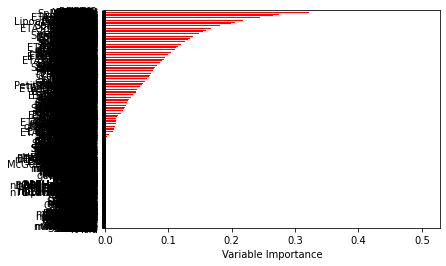

In [20]:
Importance = pd.DataFrame({'Importance':rf_features_rf.feature_importances_*100}, 
                          index = X.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh',
                                              color = 'r', )

plt.xlabel('Variable Importance')
from matplotlib.pyplot import figure



plt.gca().legend_ = None

Bagging AUC

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


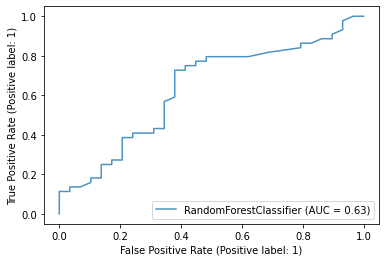

In [22]:
rfc_bag = RandomForestClassifier(max_features=1875 ,random_state=42)
rfc_bag.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc_bag, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

RF AUC

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


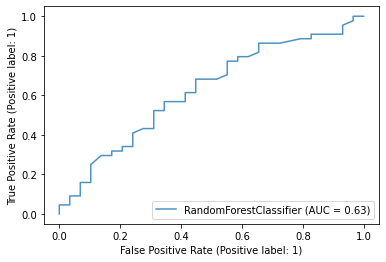

In [23]:
rfc_rf = RandomForestClassifier(max_features=99 ,random_state=42)
rfc_rf.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc_rf, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

# BEST SUBSET TAKEN FROM LASSO

In [24]:
features_sub = features[['Activity','AATS5i', 'ATSC5p', 'GATS4m', 'GATS2i', 'nHBint6', 'nHeteroRing', 'n5HeteroRing', 'nF9HeteroRing', 'nT5HeteroRing', 'geomShape', 'RDF70m', 'P1p', 'E3s']]

In [25]:
X1 = features_sub.iloc[:, 1:-1] #X-axis covers feature sub
y1 = pd.DataFrame(y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size = 0.75, random_state = 0)

Bagging

In [27]:
rf_features_1 = RandomForestRegressor(max_features = 12, random_state = 23) #Python counts from zero(hence 4), bagging is just a case where m=p
rf_features_1.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_features=12, random_state=23)

In [28]:
pred3 = rf_features_1.predict(X_test)
mean_squared_error(y_test, pred3)
pd.DataFrame(pred3)
pred3 = tf.math.round(pred3)
pred3

<tf.Tensor: shape=(73,), dtype=float64, numpy=
array([1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0.])>

In [29]:
rf_features_1.score(X_train, y_train)

0.844401798330728

In [30]:
print(classification_report(y_test, pred3, digits=3))
print(f"Average precision score: {average_precision_score(y_test, pred3):.3f}")
print("Cohen kappa score: ", cohen_kappa_score(y_test, pred3))
print("Confusion matrix: ")
print(confusion_matrix(y_test, pred3))

              precision    recall  f1-score   support

           0      0.500     0.552     0.525        29
           1      0.683     0.636     0.659        44

    accuracy                          0.603        73
   macro avg      0.591     0.594     0.592        73
weighted avg      0.610     0.603     0.605        73

Average precision score: 0.654
Cohen kappa score:  0.18482864844050828
Confusion matrix: 
[[16 13]
 [16 28]]


RANDOM FOREST

In [31]:
rf_features_rf_1 = RandomForestRegressor(max_features =5, random_state = 23)
rf_features_rf_1.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_features=5, random_state=23)

In [32]:
pred4 = rf_features_rf_1.predict(X_test)
mean_squared_error(y_test, pred4)
pd.DataFrame(pred4)
pred4 = tf.math.round(pred4)
pred4

<tf.Tensor: shape=(73,), dtype=float64, numpy=
array([1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0.])>

In [33]:
rf_features_rf_1.score(X_train, y_train)

0.8494917172130554

In [34]:
print(classification_report(y_test, pred4, digits=3))
print(f"Average precision score: {average_precision_score(y_test, pred4):.3f}")
print("Cohen kappa score: ", cohen_kappa_score(y_test, pred4))
print("Confusion matrix: ")
print(confusion_matrix(y_test, pred4))

              precision    recall  f1-score   support

           0      0.533     0.552     0.542        29
           1      0.698     0.682     0.690        44

    accuracy                          0.630        73
   macro avg      0.616     0.617     0.616        73
weighted avg      0.632     0.630     0.631        73

Average precision score: 0.667
Cohen kappa score:  0.2321776392676277
Confusion matrix: 
[[16 13]
 [14 30]]


Bagging AUC

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


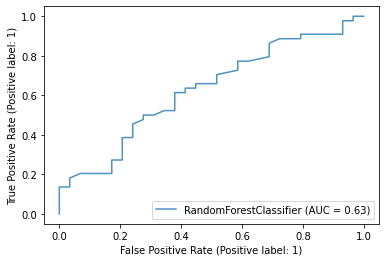

In [36]:
rfc_bag_1 = RandomForestClassifier(max_features=12, random_state=42)
rfc_bag_1.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc_bag_1, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

Random Forests AUC

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


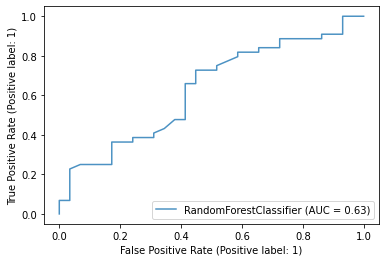

In [37]:
rfc_rf_1 = RandomForestClassifier(max_features=5 ,random_state=42)
rfc_rf_1.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc_rf_1, X_test, y_test, ax=ax, alpha=0.8)
plt.show()